In [2]:
import pandas as pd

Частина третя: Аналіз датасет c Kaggle.com
    Необхідно виконати:

        - Прочитайте csv файл (використовуйте функцію read_csv)
        - Виведіть перші п'ять рядків (використовується функція head)
        - Виведіть розміри датасету (використовуйте атрибут shape)
        - Відповідь: Про скільки книг зберігає дані датасет?

In [3]:
df = pd.read_csv('bestsellers with categories.csv')

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

Відповідь: Про скільки книг зберігає дані датасет?
    550 книги

In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Первинне дослідження даних

    - Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
    - Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
    - Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
    - Відповідь: Які є унікальні жанри?
    - Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
    - Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
    - Відповідь: Максимальна ціна?
    - Відповідь: Мінімальна ціна?
    - Відповідь: Середня ціна?
    - Відповідь: Медіанна ціна?

In [6]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

- Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
    Ні

In [7]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

- Відповідь: Які є унікальні жанри?
    Non Fiction, Fiction

<Axes: ylabel='Frequency'>

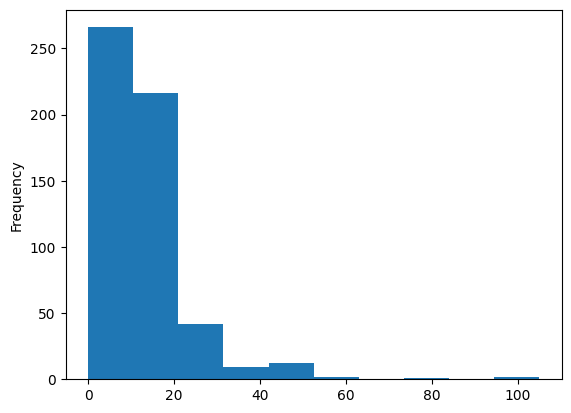

In [8]:
import matplotlib.pyplot as plt

df["price"].plot(kind="hist")

In [9]:
print(df["price"].max())
print(df["price"].min())
print(df["price"].mean())
print(df["price"].median())

105
0
13.1
11.0


- Відповідь: Максимальна ціна?
    105
- Відповідь: Мінімальна ціна?
    0
- Відповідь: Середня ціна?
    13.1
- Відповідь: Медіанна ціна?
    11.0

Пошук та сортування даних

    - Який рейтинг у датасеті найвищий? 
        Відповідь: 4.9

    - Скільки книг мають такий рейтинг? 
        Відповідь: 52

    - Яка книга має найбільше відгуків? 
        Відповідь: Where the Crawdads Sing

    - З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
        Відповідь: Publication Manual of the American Psychologic...	American Psychological Association

    - Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
        Відповідь: 20

    - Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
        Відповідь: 1

    - І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
    
    - Яка книга остання у відсортованому списку? 
        Відповідь: Old School (Diary of a Wimpy Kid #10)

In [10]:
df["user_rating"].max()

4.9

In [11]:
df[(df["user_rating"] == df["user_rating"].max())]["user_rating"].count()

52

In [12]:
df[df["reviews"] == df["reviews"].max()]["name"]

534    Where the Crawdads Sing
Name: name, dtype: object

In [13]:
df_2015 = df[df["year"] == 2015]
df_2015[df_2015["price"] == df_2015["price"].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [14]:
df[(df["genre"]=="Fiction") & (df["year"]==2010) ].shape

(20, 7)

In [15]:
df[(df["user_rating"]==4.9) & ((df["year"]==2010) | (df["year"]==2011))].count()

name           1
author         1
user_rating    1
reviews        1
price          1
year           1
genre          1
dtype: int64

In [16]:
df_2015[df_2015["price"] < 8].sort_values(by="price")

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [17]:
df_2015[df_2015["price"] < 8].sort_values(by="price").iloc[-1]['name']

'Old School (Diary of a Wimpy Kid #10)'

Агрегування даних та з'єднання таблиць

    - Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

    - Максимальна ціна для жанру Fiction: 
        Відповідь 82

    - Мінімальна ціна для жанру Fiction: 
        Відповідь 0

    - Максимальна ціна для жанру Non Fiction:  
        Відповідь 105

    - Мінімальна ціна для жанру Non Fiction: 
        Відповідь 0

    - Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

    - Якої розмірності вийшла таблиця? 
        Відповідь (248, 1)

    - Який автор має найбільше книг? 
        Відповідь Jeff Kinney

    - Скільки книг цього автора? 
        Відповідь 12

    - Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

    - У якого автора середній рейтинг мінімальний? 
        Відповідь Donna Tartt

    Який у цього автора середній рейтинг? 
        Відповідь 3.9

    - З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

    - Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

    - Який автор перший у списку?
        Muriel Barbery
        

In [18]:
df.groupby("genre").agg({"price" : [max, min]})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

In [20]:
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [29]:
new_df = df.groupby("author").agg(count = ("name", len))
print(new_df.shape)
print(new_df[new_df["count"] == new_df["count"].max()]
)

(248, 1)
             count
author            
Jeff Kinney     12


In [43]:
new_df2 = df.groupby("author").agg({'user_rating' : 'mean'})
print(new_df2)
print(new_df2[new_df2["user_rating"] == new_df2["user_rating"].min()])

                            user_rating
author                                 
Abraham Verghese               4.600000
Adam Gasiewski                 4.400000
Adam Mansbach                  4.800000
Adir Levy                      4.800000
Admiral William H. McRaven     4.700000
...                                 ...
Walter Isaacson                4.566667
William Davis                  4.400000
William P. Young               4.600000
Wizards RPG Team               4.800000
Zhi Gang Sha                   4.600000

[248 rows x 1 columns]
             user_rating
author                  
Donna Tartt          3.9


In [44]:
new_df3 = pd.concat([new_df, new_df2], axis=1)
new_df3

,count,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [46]:
new_df3.sort_values(by=["count", "user_rating"])

,count,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364
